In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import os

rttm_dir = '../data/rttm/'
rttm_header = ['Type', 'File ID', 'Channel ID', 'start_ms', 'duration_ms', 'Orthography Field', 'Speaker Type', 'Speaker Name', 'Confidence Score', 'Signal Lookahead Time']

In [9]:
rttm_fns = os.listdir(rttm_dir)
rttm = pd.DataFrame()
for fn in rttm_fns:
    rttm_i = pd.read_csv(rttm_dir + fn, delimiter=' ', names=rttm_header)
    rttm_i = rttm_i.drop(columns=['Type', 'Channel ID', 'Orthography Field', 'Speaker Type', 'Confidence Score', 'Signal Lookahead Time'])
    rttm = pd.concat([rttm, rttm_i])

rttm['start_ms'] = rttm['start_ms'] * 1000
rttm['duration_ms'] = rttm['duration_ms'] * 1000

rttm

,File ID,start_ms,duration_ms,Speaker Name
0,Animals_We_Could_Beat_in_a_Fight__Trash_Taste_...,8.0,985.0,SPEAKER_00
1,Animals_We_Could_Beat_in_a_Fight__Trash_Taste_...,1078.0,1986.0,SPEAKER_00
2,Animals_We_Could_Beat_in_a_Fight__Trash_Taste_...,3200.0,3684.0,SPEAKER_00
3,Animals_We_Could_Beat_in_a_Fight__Trash_Taste_...,5764.0,1053.0,SPEAKER_01
4,Animals_We_Could_Beat_in_a_Fight__Trash_Taste_...,6885.0,187.0,SPEAKER_01
...,...,...,...,...
2304,What_Anime_Conventions_DONT_Tell_You__Trash_Ta...,6885781.0,12971.0,SPEAKER_01
2305,What_Anime_Conventions_DONT_Tell_You__Trash_Ta...,6887598.0,713.0,SPEAKER_00
2306,What_Anime_Conventions_DONT_Tell_You__Trash_Ta...,6895730.0,272.0,SPEAKER_02
2307,What_Anime_Conventions_DONT_Tell_You__Trash_Ta...,6897954.0,153.0,SPEAKER_00


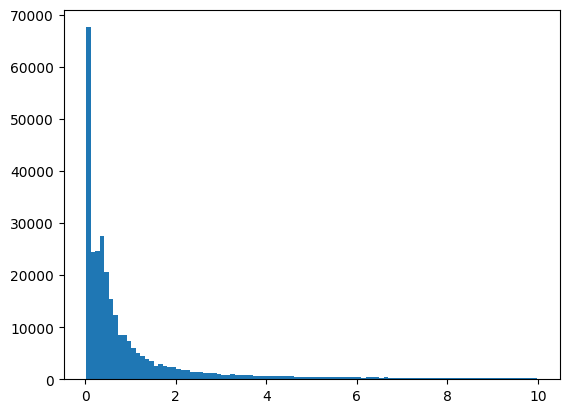

In [22]:
low_dur = rttm[rttm['duration_ms'] < (10 * 1000)]

plt.hist(low_dur['duration_ms'] / 1000, bins=100)
# plt.yscale('log')
plt.show()

In [23]:
import json

subtitle_dir = '../data/raw/'

In [26]:
sub_fns = [file for file in os.listdir(subtitle_dir) if file.endswith('.json3')]

In [30]:
types = [fn.split('.')[1] for fn in sub_fns]
type_dict = {}

for t in types:
    if t not in type_dict:
        type_dict[t] = 0
    type_dict[t] += 1

type_dict

{'en-ehkg1hFWq8A': 81,
 'en-en-ehkg1hFWq8A': 81,
 'en-orig': 111,
 'en': 112,
 'I': 2,
 '': 2}

In [31]:
for fn in sub_fns:
    if 'en' not in fn.split('.')[1]:
        print(fn)

This_Episode_is_A.I._Generated__Trash_Taste_#136_KOsR7CYcuaM.en-orig.json3
This_Episode_is_A.I._Generated__Trash_Taste_#136_KOsR7CYcuaM.en.json3
We_Dont_Know_How_To_Make_Friends...__Trash_Taste_#159_aTP4X03HWc4.en-orig.json3
We_Dont_Know_How_To_Make_Friends...__Trash_Taste_#159_aTP4X03HWc4.en.json3


In [47]:
eps = {}

for fn in sub_fns:
    ident = fn.split('.')[0]
    if ident not in eps:
        eps[ident] = []
    eps[ident].append(fn)

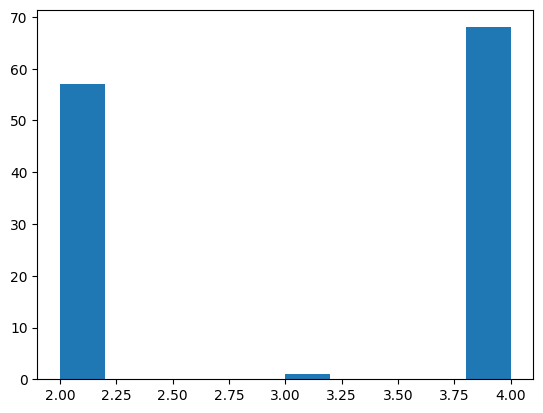

In [48]:
sub_ns = [len(v) for v in eps.values()]

plt.hist(sub_ns)
plt.show()

In [51]:
for ep, subs in eps.items():
    found = False
    for sub in subs:
        if '.en.' in sub:
            found = True
            break
    if not found:
        print(ep)
        print(subs)

Anime_Convention_Horror_Stories__Trash_Taste_#22_1t1lme5nGZE
['Anime_Convention_Horror_Stories__Trash_Taste_#22_1t1lme5nGZE.en-ehkg1hFWq8A.json3', 'Anime_Convention_Horror_Stories__Trash_Taste_#22_1t1lme5nGZE.en-en-ehkg1hFWq8A.json3']
Our_Trash_Taste_in_YouTubers__Trash_Taste_#26_og8CYLCRXeo
['Our_Trash_Taste_in_YouTubers__Trash_Taste_#26_og8CYLCRXeo.en-ehkg1hFWq8A.json3', 'Our_Trash_Taste_in_YouTubers__Trash_Taste_#26_og8CYLCRXeo.en-en-ehkg1hFWq8A.json3']
Roasting_our_WORST_Takes_on_Anime__Trash_Taste_#21_nGx-x0jrE2o
['Roasting_our_WORST_Takes_on_Anime__Trash_Taste_#21_nGx-x0jrE2o.en-ehkg1hFWq8A.json3', 'Roasting_our_WORST_Takes_on_Anime__Trash_Taste_#21_nGx-x0jrE2o.en-en-ehkg1hFWq8A.json3']
The_Internet_Kinda_Sucks_Right_Now__Trash_Taste_#7_SOOPOMAueUA
['The_Internet_Kinda_Sucks_Right_Now__Trash_Taste_#7_SOOPOMAueUA.en-ehkg1hFWq8A.json3', 'The_Internet_Kinda_Sucks_Right_Now__Trash_Taste_#7_SOOPOMAueUA.en-en-ehkg1hFWq8A.json3']
The_Japanese_Food_Youve_Never_Tried__Trash_Taste_#17_pxhJ

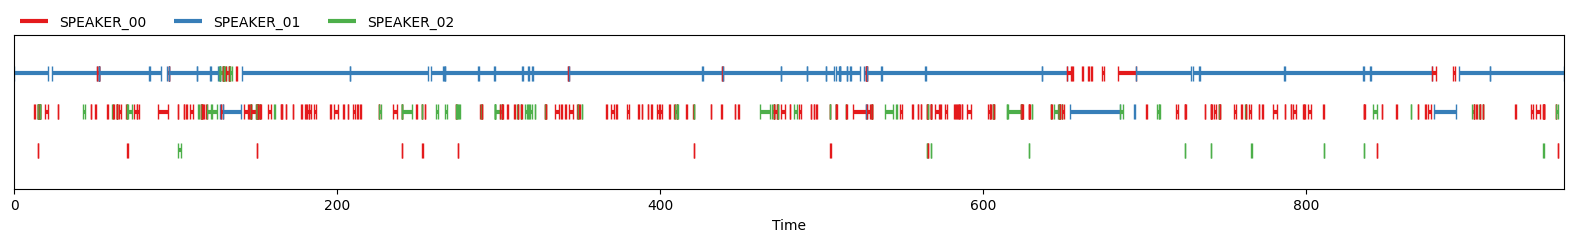

In [20]:
from pyannote.database.util import load_rttm
from pyannote.core import notebook, Segment
notebook.crop = Segment(0, 480 * 2)

REFERENCE = f"../data/rttm/What_Anime_Conventions_DONT_Tell_You__Trash_Taste_#160_rf1UB1JTDik.rttm"
reference = load_rttm(REFERENCE)['What_Anime_Conventions_DONT_Tell_You__Trash_Taste_#160_rf1UB1JTDik']
reference

In [21]:
import os
import pandas as pd
import json

# Assuming the directory structure and file formats you've provided
rttm_dir = '../data/rttm/'
assignment_dir = '../data/assignments/'

# Function to load RTTM data
def load_rttm(file_path):
    rttm_header = ['Type', 'File ID', 'Channel ID', 'start_ms', 'duration_ms', 'Orthography Field', 'Speaker Type', 'Speaker Name', 'Confidence Score', 'Signal Lookahead Time']
    return pd.read_csv(file_path, delimiter=' ', names=rttm_header)

# Function to load assignment files
def load_assignments(file_path):
    with open(file_path, 'r') as f:
        assignments = json.load(f)
    # Invert the assignment dictionary to map speaker_id to name
    return {v: k for k, v in assignments.items()}

# Process each RTTM file and corresponding assignment file
speaking_time_per_episode = {}
for rttm_file in os.listdir(rttm_dir):
    if rttm_file.endswith('.rttm'):
        # Load RTTM data
        rttm_data = load_rttm(os.path.join(rttm_dir, rttm_file))

        # Load and invert assignments (if exists)
        assignment_file = rttm_file.replace('.rttm', '.json')
        if os.path.exists(os.path.join(assignment_dir, assignment_file)):
            assignments = load_assignments(os.path.join(assignment_dir, assignment_file))

            # Convert speaker IDs to names in RTTM data using assignments
            rttm_data['Speaker Name'] = rttm_data['Speaker Name'].apply(lambda x: assignments.get(x, x))

        # Calculate speaking time for each speaker in the episode
        episode_speaking_time = rttm_data.groupby('Speaker Name')['duration_ms'].sum().to_dict()

        # Store results
        speaking_time_per_episode[rttm_file] = episode_speaking_time

# Display results
speaking_time_per_episode

{'Animals_We_Could_Beat_in_a_Fight__Trash_Taste_#91_ZWS2nFo7eEo.rttm': {'connor': 1419.411,
  'garnt': 153.932,
  'joey': 7326.536},
 'Anime_Convention_Horror_Stories__Trash_Taste_#22_1t1lme5nGZE.rttm': {'connor': 2176.081,
  'garnt': 346.263,
  'joey': 6711.8550000000005},
 'Are_Online_Friends_REAL_Friends__Trash_Taste_#28_Zk8QMtjnRj0.rttm': {'connor': 6252.236,
  'garnt': 2769.182,
  'joey': 435.841},
 'Christmas_Horror_Stories__Trash_Taste_#29_TBGk1TKhVeA.rttm': {'connor': 1126.77,
  'garnt': 264.345,
  'joey': 6539.85},
 'CHRISTMAS_IS_CANCELED__Trash_Taste_#131_0G4gYj446dA.rttm': {'connor': 515.619,
  'garnt': 4771.314,
  'joey': 3001.026},
 'College_Horror_Stories__Trash_Taste_#12_GMCxI2KJp3Y.rttm': {'connor': 945.381,
  'garnt': 420.084,
  'joey': 6543.593},
 'Cycling_is_HARD__Trash_Taste_#117_bYIb-YaaCMY.rttm': {'connor': 7310.169,
  'garnt': 603.696,
  'joey': 864.1129999999999},
 'Defending_Our_WORST_Takes_Weve_Had__Trash_Taste_#130_ZkVuuKR8fg0.rttm': {'connor': 1683.639,
  'g

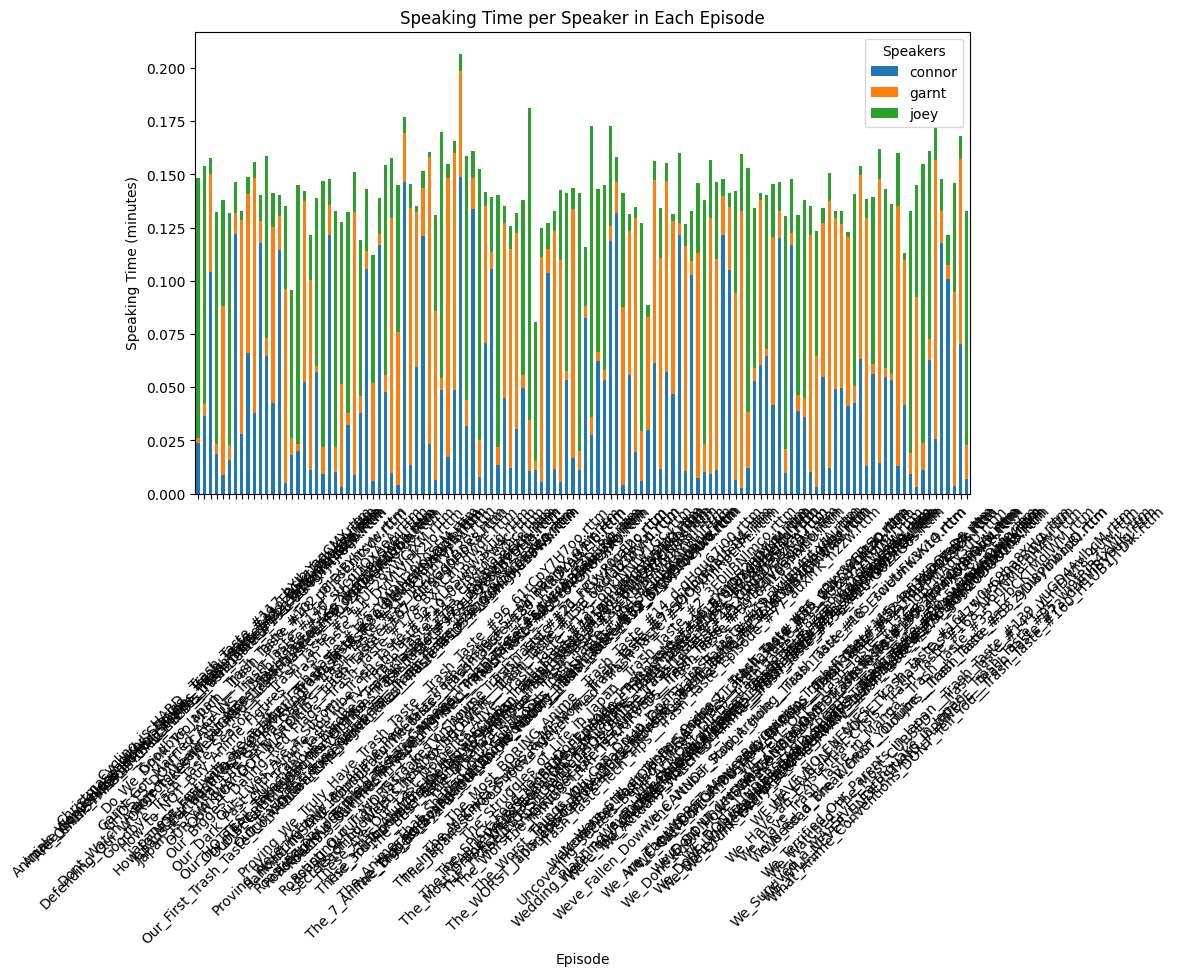

In [22]:
import matplotlib.pyplot as plt

# Convert speaking time from milliseconds to minutes for readability
for episode, times in speaking_time_per_episode.items():
    for speaker in times:
        speaking_time_per_episode[episode][speaker] = times[speaker] / 60000  # Convert ms to minutes

# Creating a DataFrame for easier plotting
df = pd.DataFrame.from_dict(speaking_time_per_episode, orient='index')
df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Speaking Time per Speaker in Each Episode')
plt.xlabel('Episode')
plt.ylabel('Speaking Time (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Speakers')
plt.show()

In [23]:
df

,connor,garnt,joey
Animals_We_Could_Beat_in_a_Fight__Trash_Taste_#91_ZWS2nFo7eEo.rttm,0.023657,0.002566,0.122109
Anime_Convention_Horror_Stories__Trash_Taste_#22_1t1lme5nGZE.rttm,0.036268,0.005771,0.111864
Are_Online_Friends_REAL_Friends__Trash_Taste_#28_Zk8QMtjnRj0.rttm,0.104204,0.046153,0.007264
Christmas_Horror_Stories__Trash_Taste_#29_TBGk1TKhVeA.rttm,0.018780,0.004406,0.108998
CHRISTMAS_IS_CANCELED__Trash_Taste_#131_0G4gYj446dA.rttm,0.008594,0.079522,0.050017
...,...,...,...
We_Survived_a_MASSIVE_Earthquake_in_Japan__Trash_Taste_#95_wi9fRiR4xWk.rttm,0.117582,0.015041,0.015187
We_Terrified_Our_Parents_in_Japan__Trash_Taste_#139_yuGD4AvlbcM.rttm,0.100691,0.006843,0.013991
We_Watched_The_Most_CURSED___Trash_Taste_#144_uLmDNT8_4Uw.rttm,0.003664,0.090996,0.051385
WE_WILL_NEVER_UNDERSTAND_JAPANESE__Trash_Taste_#73_duEihBy6ujg.rttm,0.070076,0.086961,0.010912


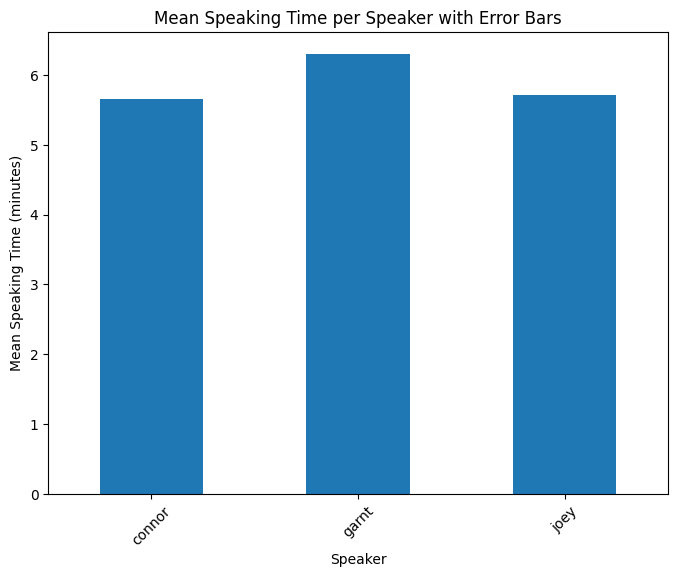

In [24]:
# Calculating the mean and standard deviation for each speaker across episodes
mean_speaking_time = df.sum()

# Plotting the mean speaking time with error bars
plt.figure(figsize=(8, 6))
mean_speaking_time.plot(kind='bar', capsize=4)

plt.title('Mean Speaking Time per Speaker with Error Bars')
plt.xlabel('Speaker')
plt.ylabel('Mean Speaking Time (minutes)')
plt.xticks(rotation=45)
plt.show()